**Extract dataset from drive and store in a temporary folder**

In [ ]:
# Load the Drive helper and mount
import zipfile
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/mri/MRI DATASET.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/drive


**Step 1:Import required libraries**

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Step 2: Load the image and convert it to a data frame.**

In [ ]:
Categories=['Tumour','NoTumour']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='../tmp/MRI DATASET/'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : Tumour
loaded category:Tumour successfully
loading... category : NoTumour
loaded category:NoTumour successfully


In [ ]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(100, 22501)

**Step 3: Separate input features and targets.**

Separate input and out features from the newly created dataframe

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

**Step 4: Separate input features and targets.**

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

**Step 5: Build and train the model**

In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

**Step 6: Model evaluation**
Now the model is tested using testing data in this way model.predict() and the accuracy of the model can be calculated using the accuracy_score() method from sklearn.metrics

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 90.0% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Tumour', 'No tumor']))

              precision    recall  f1-score   support

      Tumour       0.83      1.00      0.91        10
    No tumor       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



**Step 7: Prediction**

Now we will give a new image to our model and it will predict whether the given image is of cat or dog

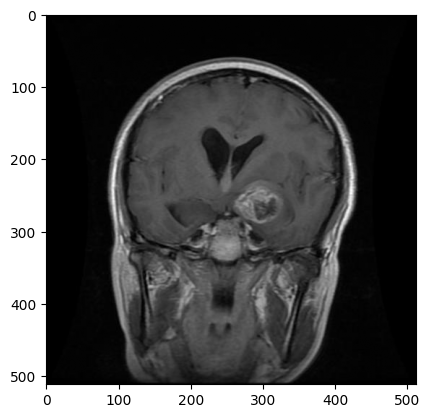

The predicted image is : Tumour


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
path = '../tmp/MRI DATASET/Tumour/Tr-gl_1170.jpg'
img = imread(path, as_gray=True)  # Read the image as grayscale

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.show()

# Resize the image to (150, 150)
img_resize = resize(img, (150, 150))

# Flatten the resized image
l = [img_resize.flatten()]

# Get the prediction probabilities
probability = model.predict_proba(l)

# Uncomment the code below to print class probabilities
# for ind, val in enumerate(Categories):
#     print(f'{val} = {probability[0][ind]*100}%')

# Print the predicted class
print("The predicted image is : " + Categories[model.predict(l)[0]])


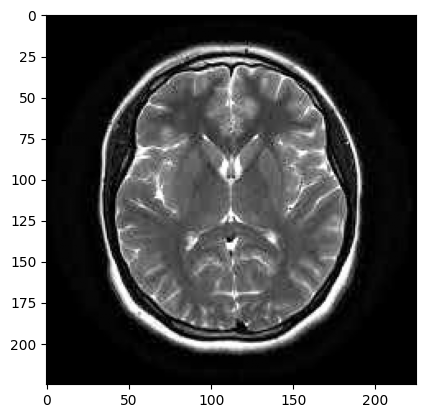

The predicted image is : NoTumour


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
path = '../tmp/MRI DATASET/NoTumour/Tr-no_1530.jpg'
img = imread(path, as_gray=True)  # Read the image as grayscale

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.show()

# Resize the image to (150, 150)
img_resize = resize(img, (150, 150))

# Flatten the resized image
l = [img_resize.flatten()]

# Get the prediction probabilities
probability = model.predict_proba(l)

# Uncomment the code below to print class probabilities
# for ind, val in enumerate(Categories):
#     print(f'{val} = {probability[0][ind]*100}%')

# Print the predicted class
print("The predicted image is : " + Categories[model.predict(l)[0]])
